In [25]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab

np.set_printoptions(suppress=True)

from scipy.optimize import curve_fit

In [2]:
df_plurality = pd.read_csv('parallel_merge_plurality.csv', names=['k','node','number_influenced','s'])
df_max = pd.read_csv('parallel_merge_max.csv', names=['k','node','number_influenced','s'])
df_min = pd.read_csv('parallel_merge_min.csv', names=['k','node','number_influenced','s'])
df_random = pd.read_csv('parallel_merge_random.csv', names=['k','node','number_influenced','s'])

In [3]:
def transform_data_plot(df):
    df_t = df.copy()

    # Get only rows with the max k-value
    idx = df_t.groupby(['node','s'])['k'].transform(max) == df_t['k']
    df_t = df_t[idx][['node','number_influenced','s']]
    df_t = df_t.reset_index(drop=True)
    
    # Group by s and calculate the mean
    df_t = df_t[['s','number_influenced']].groupby(by='s', as_index=False).mean()
        
    return df_t

## Simple majority

In [4]:
df_plot = transform_data_plot(df_plurality).round(3)
df_plot.head()

,s,number_influenced
0,0,1.161
1,1,12.075
2,2,468.778
3,3,2488.339
4,4,8114.379


In [5]:
def bass_wo(x, M, P, Q):
    """
    p: coefficinet of innvotion
    q: coefficient of imitation
    m: potential pool of adapoters
    
    The average value of p has been found to be 0.03, and is often less than 0.01
    The average value of q has been found to be 0.38, with a typical range between 0.3 and 0.5
    """
    y = M * (((P+Q)**2/P)*np.exp(-(P+Q)*(x)))/(1+(Q/P)*np.exp(-(P+Q)*(x)))**2 
    return y

In [6]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [7]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([   1.161,   10.914,  456.703, 2019.561, 5626.04 , 5276.519,
       3434.317, 1068.381,  386.185,  133.122,   41.833,   11.663,
          2.111,    0.247,    0.282,    0.751,    0.133,    0.077])

In [8]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

[18765.29644858     0.00322288     1.28619425]


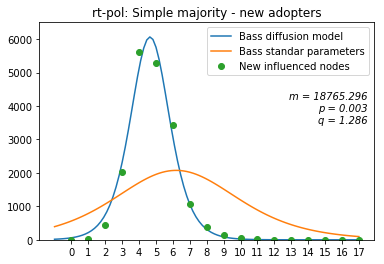

In [9]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Simple majority - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Max

In [10]:
df_plot = transform_data_plot(df_max).round(3)
df_plot.head()

,s,number_influenced
0,0,1.152
1,1,11.181
2,2,381.476
3,3,2292.954
4,4,7796.951


In [11]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [12]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([   1.152,   10.029,  370.295, 1911.478, 5503.997, 5482.379,
       3515.966, 1091.183,  390.247,  135.618,   42.254,   11.771,
          2.134,    0.253,    0.283,    0.751,    0.133,    0.077])

In [13]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

[18789.85094759     0.00284807     1.3027172 ]


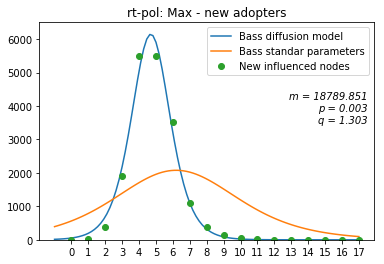

In [14]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Max - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Min

In [15]:
df_plot = transform_data_plot(df_min).round(3)
df_plot.head()

,s,number_influenced
0,0,1452.124
1,1,2243.258
2,2,4084.759
3,3,5260.155
4,4,9473.139


In [16]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [17]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([1452.124,  791.134, 1841.501, 1175.396, 4212.984, 4360.784,
       3137.819,  971.079,  352.171,  122.118,   38.603,   10.882,
          1.983,    0.234,    0.242,    0.736,    0.133,    0.077])

In [18]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

[37.19331154 39.04261134 22.64512111]


/home/w/.local/lib/python3.5/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


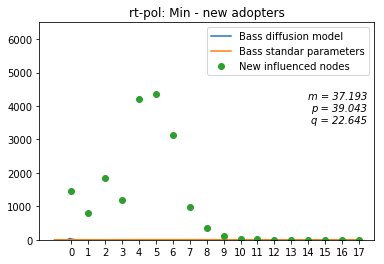

In [19]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Min - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()

## Random

In [20]:
df_plot = transform_data_plot(df_random).round(3)
df_plot.head()

,s,number_influenced
0,0,182.057
1,1,792.560
2,2,2311.551
3,3,3901.335
4,4,8563.746


In [21]:
xdata = df_plot['s'].values
ydata = df_plot['number_influenced'].values

In [22]:
inverse_cum = df_plot['number_influenced'].values.copy()
inverse_cum[1:] -= inverse_cum[:-1].copy()
inverse_cum

array([ 182.057,  610.503, 1518.991, 1589.784, 4662.411, 4840.077,
       3405.067, 1084.702,  385.457,  133.643,   41.676,   11.671,
          2.343,    0.29 ,    0.201,    0.87 ,    0.103,    0.154])

In [23]:
popt, pcov = curve_fit(bass_wo, xdata, inverse_cum)

m = popt[0].round(3)
p = popt[1].round(3)
q = popt[2].round(3)

print(popt)

[18046.7763558      0.00535312     1.1285022 ]


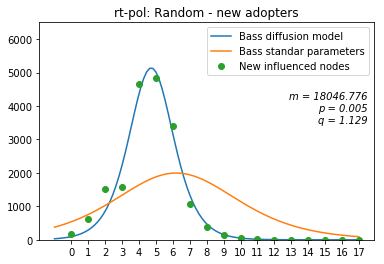

In [24]:
x = np.linspace(-1, 17, 100)
y = bass_wo(x, *popt)
y_standar = bass_wo(x, m, 0.03, 0.38)

plt.title('rt-pol: Random - new adopters')
var_text = 'm = {}\np = {}\nq = {}'.format(m,p,q)
plt.text(17.5, 3500, var_text, horizontalalignment='right', style='italic')

pylab.plot(x, y, label='Bass diffusion model')
pylab.plot(x, y_standar, label='Bass standar parameters')
pylab.plot(xdata, inverse_cum, 'o', label='New influenced nodes')

pylab.ylim(0,6500)
pylab.xticks(range(0, 18))
pylab.legend(loc='best')
pylab.show()